In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Data Preprocessing

In [2]:
beer = pd.read_csv('../data/raw/beer_reviews.csv')

In [3]:
beer

brewery_id                 brewery_name  review_time  review_overall  \
0             10325              Vecchio Birraio   1234817823             1.5   
1             10325              Vecchio Birraio   1235915097             3.0   
2             10325              Vecchio Birraio   1235916604             3.0   
3             10325              Vecchio Birraio   1234725145             3.0   
4              1075      Caldera Brewing Company   1293735206             4.0   
...             ...                          ...          ...             ...   
1586609       14359  The Defiant Brewing Company   1162684892             5.0   
1586610       14359  The Defiant Brewing Company   1161048566             4.0   
1586611       14359  The Defiant Brewing Company   1160702513             4.5   
1586612       14359  The Defiant Brewing Company   1160023044             4.0   
1586613       14359  The Defiant Brewing Company   1160005319             5.0   

         review_aroma  review_appearance review_profilename  \
0                 2.0                2.5            stcules   
1                 2.5                3.0            stcules   
2                 2.5                3.0            stcules   
3                 3.0                3.5            stcules   
4                 4.5                4.0     johnmichaelsen   
...               ...                ...                ...   
1586609           4.0                3.5         maddogruss   
1586610           5.0                2.5          yelterdow   
1586611           3.5                3.0           TongoRad   
1586612           4.5                4.5           dherling   
1586613           4.5                4.5               cbl2   

                             beer_style  review_palate  review_taste  \
0                            Hefeweizen            1.5           1.5   
1                    English Strong Ale            3.0           3.0   
2                Foreign / Export Stout            3.0           3.0   
3                       German Pilsener            2.5           3.0   
4        American Double / Imperial IPA            4.0           4.5   
...                                 ...            ...           ...   
1586609                     Pumpkin Ale            4.0           4.0   
1586610                     Pumpkin Ale            2.0           4.0   
1586611                     Pumpkin Ale            3.5           4.0   
1586612                     Pumpkin Ale            4.5           4.5   
1586613                     Pumpkin Ale            4.5           4.5   

                      beer_name  beer_abv  beer_beerid  
0                  Sausa Weizen       5.0        47986  
1                      Red Moon       6.2        48213  
2        Black Horse Black Beer       6.5        48215  
3                    Sausa Pils       5.0        47969  
4                 Cauldron DIPA       7.7        64883  
...                         ...       ...          ...  
1586609      The Horseman's Ale       5.2        33061  
1586610      The Horseman's Ale       5.2        33061  
1586611      The Horseman's Ale       5.2        33061  
1586612      The Horseman's Ale       5.2        33061  
1586613      The Horseman's Ale       5.2        33061  

[1586614 rows x 13 columns]

In [4]:
target = 'beer_style'
print('Number of classes: ', len(beer[target].unique()))

Number of classes:  104


In [5]:
target_counts = beer[target].value_counts()
target_counts

beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: count, Length: 104, dtype: int64

In [6]:
classes = target_counts.index.tolist()
classes_set = set(classes)

In [7]:
dataframe = beer

In [8]:
dataframe

brewery_id                 brewery_name  review_time  review_overall  \
0             10325              Vecchio Birraio   1234817823             1.5   
1             10325              Vecchio Birraio   1235915097             3.0   
2             10325              Vecchio Birraio   1235916604             3.0   
3             10325              Vecchio Birraio   1234725145             3.0   
4              1075      Caldera Brewing Company   1293735206             4.0   
...             ...                          ...          ...             ...   
1586609       14359  The Defiant Brewing Company   1162684892             5.0   
1586610       14359  The Defiant Brewing Company   1161048566             4.0   
1586611       14359  The Defiant Brewing Company   1160702513             4.5   
1586612       14359  The Defiant Brewing Company   1160023044             4.0   
1586613       14359  The Defiant Brewing Company   1160005319             5.0   

         review_aroma  review_appearance review_profilename  \
0                 2.0                2.5            stcules   
1                 2.5                3.0            stcules   
2                 2.5                3.0            stcules   
3                 3.0                3.5            stcules   
4                 4.5                4.0     johnmichaelsen   
...               ...                ...                ...   
1586609           4.0                3.5         maddogruss   
1586610           5.0                2.5          yelterdow   
1586611           3.5                3.0           TongoRad   
1586612           4.5                4.5           dherling   
1586613           4.5                4.5               cbl2   

                             beer_style  review_palate  review_taste  \
0                            Hefeweizen            1.5           1.5   
1                    English Strong Ale            3.0           3.0   
2                Foreign / Export Stout            3.0           3.0   
3                       German Pilsener            2.5           3.0   
4        American Double / Imperial IPA            4.0           4.5   
...                                 ...            ...           ...   
1586609                     Pumpkin Ale            4.0           4.0   
1586610                     Pumpkin Ale            2.0           4.0   
1586611                     Pumpkin Ale            3.5           4.0   
1586612                     Pumpkin Ale            4.5           4.5   
1586613                     Pumpkin Ale            4.5           4.5   

                      beer_name  beer_abv  beer_beerid  
0                  Sausa Weizen       5.0        47986  
1                      Red Moon       6.2        48213  
2        Black Horse Black Beer       6.5        48215  
3                    Sausa Pils       5.0        47969  
4                 Cauldron DIPA       7.7        64883  
...                         ...       ...          ...  
1586609      The Horseman's Ale       5.2        33061  
1586610      The Horseman's Ale       5.2        33061  
1586611      The Horseman's Ale       5.2        33061  
1586612      The Horseman's Ale       5.2        33061  
1586613      The Horseman's Ale       5.2        33061  

[1586614 rows x 13 columns]

In [9]:
dataframe.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [10]:
# Select relevant features
features = ['brewery_name', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
target = 'beer_style'

In [11]:
dataframe.head(3)

brewery_id  review_overall  review_aroma  review_appearance  \
0       10325             1.5           2.0                2.5   
1       10325             3.0           2.5                3.0   
2       10325             3.0           2.5                3.0   

  review_profilename              beer_style  review_palate  review_taste  \
0            stcules              Hefeweizen            1.5           1.5   
1            stcules      English Strong Ale            3.0           3.0   
2            stcules  Foreign / Export Stout            3.0           3.0   

   beer_abv  
0       5.0  
1       6.2  
2       6.5

In [12]:
# check duplicates
print('Number of duplicated records:', dataframe.duplicated().sum())

# drop duplicates
dataframe.drop_duplicates(inplace=True)

Number of duplicated records: 2328


In [13]:
print('Data shape:', dataframe.shape)

Data shape: (1584286, 9)


## Sampling

Since the dataset is too big, we need to sample the data, the sampling strategy is as follows:
1. for target with more than `threshold` records, we will sample `threshold` records
2. for target with less than `threshold` records, we will keep them as they are

In [14]:
target_counts = dataframe[target].value_counts()
target_counts

beer_style
American IPA                        117195
American Double / Imperial IPA       85811
American Pale Ale (APA)              63398
Russian Imperial Stout               53994
American Double / Imperial Stout     50581
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  296
Happoshu                               240
Name: count, Length: 104, dtype: int64

In [15]:
threshold = 3000

over_threshold = target_counts[target_counts > threshold]
over_threshold

beer_style
American IPA                        117195
American Double / Imperial IPA       85811
American Pale Ale (APA)              63398
Russian Imperial Stout               53994
American Double / Imperial Stout     50581
                                     ...  
Rauchbier                             3961
American Malt Liquor                  3921
Wheatwine                             3709
Berliner Weissbier                    3473
English Stout                         3014
Name: count, Length: 82, dtype: int64

In [16]:
target_classes_over = set(over_threshold.index)
# records of target classes that are under threshold
dataframe_under = dataframe[~dataframe[target].isin(target_classes_over)]
# records of target classes that are over threshold
dataframe_over = dataframe[dataframe[target].isin(target_classes_over)]

In [17]:
# sample from these targets
sample_dataframe = []
for target, group in dataframe_over.groupby(target):
    sample_dataframe.append(group.sample(threshold, replace=False, random_state=2023))
sample_dataframe = pd.concat(sample_dataframe, axis=0)

In [18]:
# concatenate the two dataframes
sample_dataframe = pd.concat([dataframe_under, sample_dataframe], axis=0)

In [19]:
print('Sample size:', sample_dataframe.shape)

Sample size: (280331, 9)


In [20]:
# now check if there are inconsistencies, for example, sample examples may have same feature values,
# but different target values
target = 'beer_style'
features = [col for col in sample_dataframe.columns if col != target]
num_duplicates = sample_dataframe[features].duplicated().sum()

# this indicates that these samples have the same feature values, but different target values,
# which may be a problem and disturbing the model
print('Number of duplicates:', num_duplicates)

sample_dataframe.drop_duplicates(subset=features, inplace=True)

target_counts = sample_dataframe[target].value_counts()
target_counts

Number of duplicates: 201


beer_style
American Blonde Ale                   3000
Russian Imperial Stout                3000
American Adjunct Lager                3000
American Double / Imperial Pilsner    3000
American Double / Imperial Stout      3000
                                      ... 
Gose                                   686
Faro                                   608
Roggenbier                             466
Kvass                                  296
Happoshu                               240
Name: count, Length: 104, dtype: int64

## Missing values

In [21]:
dataframe = sample_dataframe

In [22]:
# check for missing values in the target
dataframe[target].isna().sum()

0

In [23]:
features = dataframe.columns.tolist()
features.remove(target)

# before we further process the data, let's split it into train and test to prevent data leakage
X, y = dataframe[features], dataframe[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [24]:
X_train.shape, X_test.shape

((224104, 8), (56026, 8))

In [25]:
X_train.isna().sum()

brewery_id                0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename       48
review_palate             0
review_taste              0
beer_abv              10219
dtype: int64

In [26]:
X_test.isna().sum()

brewery_id               0
review_overall           0
review_aroma             0
review_appearance        0
review_profilename       8
review_palate            0
review_taste             0
beer_abv              2610
dtype: int64

In [27]:
col = 'review_profilename'
X_train[col].value_counts()

review_profilename
northyorksammy    891
BuckeyeNation     723
mikesgroove       624
Thorpe429         573
NeroFiddled       560
                 ... 
GreenPea            1
GoodNamesTaken      1
heapofaoatmeal      1
coolitamigo         1
timdog44            1
Name: count, Length: 16567, dtype: int64

In [28]:
# fill missing values with the most frequent value
value = X_train[col].mode()[0]
print('Fill {} with "{}"'.format(col, value))

X_train[col].fillna(value, inplace=True)
X_test[col].fillna(value, inplace=True)

Fill review_profilename with "northyorksammy"


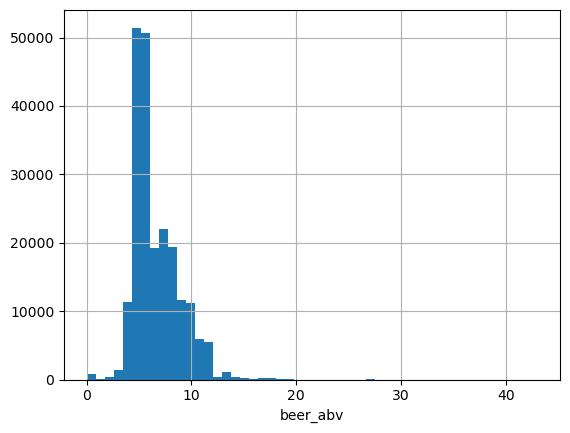

In [29]:
col = 'beer_abv'
# plot the distribution of the feature
X_train[col].hist(bins=50)
plt.xlabel(col)
plt.show()

In [30]:
# fill with the median
value = X_train[col].median()
print('Fill {} with {}'.format(col, value))

X_train[col].fillna(value, inplace=True)
X_test[col].fillna(value, inplace=True)

Fill beer_abv with 6.0


In [31]:
# check missing values again
X_train.isna().sum()

brewery_id            0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
review_palate         0
review_taste          0
beer_abv              0
dtype: int64

In [32]:
X_test.isna().sum()

brewery_id            0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
review_palate         0
review_taste          0
beer_abv              0
dtype: int64

# 2. Exploratory Data Analysis

In [33]:
# todo

# 3. Feature Engineering

## brewery_id
it's a categorical variable, so we need to convert it to dummy variables, let's check how many unique values it has and the frequency of each one

In [34]:
col = 'brewery_id'
frequency = X_train[col].value_counts()

In [35]:
frequency

brewery_id
35       6417
10099    4320
132      3484
29       2644
147      2602
         ... 
5006        1
19929       1
9921        1
5886        1
3400        1
Name: count, Length: 4320, dtype: int64

In [36]:
print('Number of breweries:', len(frequency))

Number of breweries: 4320


In [37]:
threshold = 100
print('Number of brewery with less than {} records: {}'.format(threshold, len(frequency[frequency < threshold])))

Number of brewery with less than 100 records: 3948


In [38]:
majority = frequency.index[0]
print('brewery with the most number of records:', majority)

brewery with the most number of records: 35


In [39]:
small_brewery = set(frequency[frequency < threshold].index)


def replace_brewery_id(brewery_id):
    if brewery_id in small_brewery:
        return majority
    return brewery_id

In [40]:
X_train.brewery_id = X_train.brewery_id.apply(replace_brewery_id,)
X_test.brewery_id = X_test.brewery_id.apply(replace_brewery_id,)

## 2. review_profilename

In [41]:
col = 'review_profilename'
frequncy = X_train[col].value_counts()
frequncy

review_profilename
northyorksammy    939
BuckeyeNation     723
mikesgroove       624
Thorpe429         573
NeroFiddled       560
                 ... 
GreenPea            1
GoodNamesTaken      1
heapofaoatmeal      1
coolitamigo         1
timdog44            1
Name: count, Length: 16567, dtype: int64

In [42]:
# currently let's drop review_profilename, we will try it later
X_train.drop(['review_profilename'], axis=1, inplace=True)
X_test.drop(['review_profilename'], axis=1, inplace=True)

In [43]:
X_train

brewery_id  review_overall  review_aroma  review_appearance  \
722485          689             4.0           4.5                4.0   
585260           35             4.0           4.5                4.5   
1051001         710             4.0           3.0                3.0   
212834           35             3.0           3.5                3.5   
1303848          29             1.0           1.0                1.0   
...             ...             ...           ...                ...   
398281           35             4.5           3.5                4.5   
606665           35             3.5           3.0                3.5   
1245633         209             4.5           4.5                4.5   
125472          641             4.0           4.0                4.0   
1045712          35             4.0           3.0                4.0   

         review_palate  review_taste  beer_abv  
722485             4.0           4.5      11.0  
585260             4.0           4.5       9.5  
1051001            3.5           3.0       4.9  
212834             3.5           3.0       5.2  
1303848            1.0           1.0       6.0  
...                ...           ...       ...  
398281             3.5           4.0       4.4  
606665             3.0           3.0       6.6  
1245633            4.0           4.5       7.5  
125472             4.0           3.5       6.0  
1045712            4.0           3.5       4.5  

[224104 rows x 7 columns]

In [44]:
col = 'brewery_name'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[[col]])

train_onehot = encoder.transform(X_train[[col]])
test_onehot = encoder.transform(X_test[[col]])

X_train.drop([col], axis=1, inplace=True)
X_test.drop([col], axis=1, inplace=True)

KeyError: "None of [Index(['brewery_name'], dtype='object')] are in the [columns]"

In [ ]:
# normalize the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
train_features = np.concatenate([X_train_scaled, train_onehot], axis=1)
test_features = np.concatenate([X_test_scaled, test_onehot], axis=1)
del train_onehot, test_onehot

In [ ]:
y_train = y_train.values
y_test = y_test.values

In [ ]:
NUM_CLASSES = len(classes)
print('Number of classe:', NUM_CLASSES)

In [ ]:
# map class name to index 0,1,...
class_mapper = {c: i for i, c in enumerate(classes)}
y_train_map = np.array([class_mapper[c] for c in y_train])
y_test_map = np.array([class_mapper[c] for c in y_test])

In [ ]:
# build NN model using tensorflow keras

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_features.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(0.005)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer, metrics=['accuracy'])
model.summary()

In [ ]:
# use early stopping to prevent overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
history = model.fit(train_features, y_train_map, epochs=100, validation_split = 0.2, callbacks=[callback])

In [ ]:
model.save('beer_model.h5')

In [ ]:
model.load_weights('beer_model.h5')

In [ ]:
def make_prediction(test_features, batch_size=5000):
    predictions = []
    index = 0
    while index < len(test_features):
        print('{:8d} / {:8d}'.format(index, len(test_features)))
        batch = test_features[index : index + batch_size]
        batch_prediction_result = model.predict(batch, verbose=0)
        batch_prediction_result = np.argmax(batch_prediction_result, axis=1)
        predictions.extend(batch_prediction_result)
        index += batch_size
    return np.array(predictions)

In [ ]:
y_test_pred = make_prediction(test_features)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
test_acc = (y_test_map == y_test_pred).mean()
print('Accuracy: {:.2f}%'.format(test_acc * 100))